In [ ]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf
# !pip install pyreadstat
# !pip install --upgrade pandas

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score

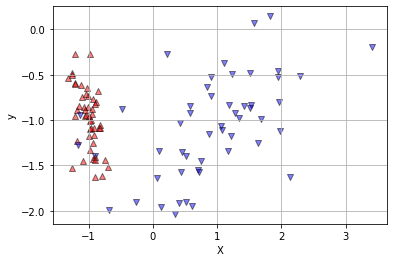

In [ ]:
sample = 100
X, y = make_classification(n_samples=sample,
                           n_features=2,
                           n_informative=2,
                           n_redundant=0,
                           n_clusters_per_class=1)
fig, ax = plt.subplots(1,1)

ax.grid()
ax.set_xlabel('X')
ax.set_ylabel('y')

for i in range(sample):
  if y[i]==0:
    ax.scatter(X[i,0],X[i,1], edgecolors='k',alpha=0.5, marker='^',color='r')
  else:
    ax.scatter(X[i,0], X[i,1], edgecolors='k',alpha=0.5, marker='v',color='b')


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train)
# model.score(X_test, y_test)

0.9125

In [ ]:
scores = cross_val_score(model, X, y, scoring='accuracy', cv=10)

In [ ]:
scores.mean()

0.9099999999999999

In [ ]:
model.intercept_

array([-0.07045021])

In [ ]:
model.coef_

array([[ 2.5451514 , -0.21793111]])

(array([-3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

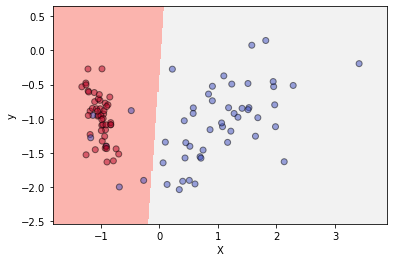

In [ ]:
x_min, x_max = X[:,0].min()-0.5, X[:,0].max()+0.5
y_min, y_max = X[:,1].min()-0.5, X[:,1].max()+0.5

# 직사각형 그리드 생성
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
xx.shape

# ravel():2차원배열 -> 1차원배열 (평탄화 작업 -> 다차원을 1차원으로)
# flatten()
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z.shape
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel1)
plt.scatter(X[:,0],X[:,1],c=np.abs(y-1),edgecolor='k',alpha=0.5, cmap=plt.cm.coolwarm)

plt.xlabel('X')
plt.ylabel('y')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks()
plt.yticks()

